In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q git+https://github.com/huggingface/transformers.git

  ERROR: Operation cancelled by user


In [3]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 12.5 MB/s eta 0:00:00


In [4]:
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from datasets import load_dataset, DatasetDict

# Load dataset
ds = load_dataset("Jiwonny29/darkmagician")

# Organize into a single DatasetDict
ds = DatasetDict({
    'train': ds['train'],
    'test': ds['test']
})

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [6]:
ds['train']

Dataset({
    features: ['image', 'id', 'name', 'type', 'desc', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 'image_url', 'image_path', 'simplified_type'],
    num_rows: 49
})

In [7]:
ds['test']

Dataset({
    features: ['image', 'id', 'name', 'type', 'desc', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 'image_url', 'image_path', 'simplified_type'],
    num_rows: 13
})

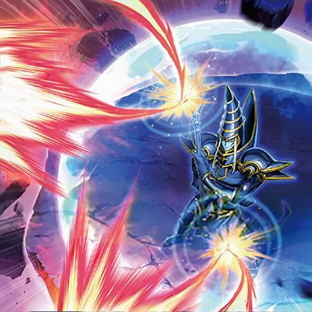

In [8]:
example = ds['train'][0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.5*width), int(0.5*height))))

In [9]:
example["name"]

'Dark Magic Mirror Force'

In [10]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["name"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        # Generate attention mask
        attention_mask = encoding["input_ids"].clone()
        attention_mask[attention_mask != self.processor.tokenizer.pad_token_id] = 1

        encoding["attention_mask"] = attention_mask

        return encoding

In [11]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [12]:
train_dataset = ImageCaptioningDataset(ds['train'], processor)

In [13]:
item = train_dataset[0]
for k,v in item.items():
  print(k,v.shape)

Unused or unrecognized kwargs: padding.


input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [15]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [16]:
processor.decode(batch["input_ids"][0])

'[CLS] dark paladin [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [ ]:
import numpy as np
from PIL import Image

# Load an image. For example, specify the image file path in 'image_path'.
image = Image.open('/content/drive/MyDrive/71039903.jpg')

# Convert the image to a numpy array.
image_array = np.array(image)

# Calculate the mean and standard deviation for each channel of the image.
mean = np.mean(image_array, axis=(0, 1))
std = np.std(image_array, axis=(0, 1))

print("Mean:", mean)
print("Std:", std)

Mean: [131.65546926 146.45824088 114.93689647]
Std: [76.93995866 72.13034857 89.25502009]


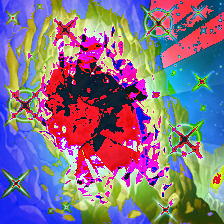

In [ ]:
from PIL import Image
import numpy as np

MEAN = np.array([131.65546926, 146.45824088, 114.93689647]) / 255
STD = np.array([76.93995866, 72.13034857, 89.25502009]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [17]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [18]:
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(12.1761, grad_fn=<NllLossBackward0>)

In [19]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch: 0
Loss: 12.299731254577637


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 10.515788078308105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.939018249511719


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.554669380187988


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.19698715209961


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.86764907836914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.611921310424805


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.4082670211792


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.17239761352539


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.004469871520996


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.81796932220459


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.629938125610352


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.439845085144043


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.259377956390381


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.0689520835876465


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.864246845245361


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.651660442352295


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.474727630615234


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.285274982452393


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.080343723297119


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.870379447937012


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.666542053222656


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.452049732208252


Unused or unrecognized kwargs: padding.


Loss: 5.2316484451293945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.078962802886963
Epoch: 1


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.809727191925049


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.59368896484375


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.3881449699401855


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.1781182289123535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.979966878890991


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.764496088027954


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.560028553009033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.344447135925293


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.141916036605835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.9086992740631104


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.687798023223877


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.5138328075408936


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.2803168296813965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.0845096111297607


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.9020811319351196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.7289844751358032


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.550040602684021


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.3954801559448242


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.2118980884552002


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.0574015378952026


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.9599725604057312


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.827363133430481


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.7300664186477661


Unused or unrecognized kwargs: padding.


Loss: 0.6207680106163025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5205655694007874
Epoch: 2


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.48821792006492615


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.4095499515533447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.34484121203422546


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.34973084926605225


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2683483064174652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2412794977426529


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.22775496542453766


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.18128272891044617


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.18187633156776428


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15553006529808044


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.14971189200878143


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.14737923443317413


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12951211631298065


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1369456797838211


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1014651507139206


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09864198416471481


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11313623934984207


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08109524846076965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08762436360120773


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07649452984333038


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07947569340467453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08157417923212051


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07190816104412079


Unused or unrecognized kwargs: padding.


Loss: 0.07362117618322372


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07384630292654037
Epoch: 3


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.062385763972997665


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09048469364643097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0533568449318409


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06127190962433815


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06909382343292236


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05305683612823486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.051520705223083496


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03950262814760208


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03851831331849098


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.045793477445840836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.058807794004678726


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.058166682720184326


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.051385924220085144


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03915002942085266


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04494854807853699


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04181596264243126


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06157876178622246


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04708387330174446


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05671665072441101


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04537872225046158


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0603538379073143


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05676514282822609


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0454738512635231


Unused or unrecognized kwargs: padding.


Loss: 0.0420391671359539


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05336317420005798
Epoch: 4


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03983382135629654


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03151177614927292


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.031554028391838074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03250085934996605


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.044546935707330704


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.033566128462553024


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.030427977442741394


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04485206678509712


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.049895938485860825


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04950789362192154


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03616245090961456


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04545489698648453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03214909881353378


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0388331264257431


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04641295596957207


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04554012417793274


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0312348660081625


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03614434972405434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04104854539036751


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03446460887789726


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03270581364631653


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03704307973384857


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03304138034582138


Unused or unrecognized kwargs: padding.


Loss: 0.028954284265637398


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07019379734992981
Epoch: 5


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03300822526216507


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05450061336159706


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.031988974660634995


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02777818776667118


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02402600832283497


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02499510534107685


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03757582977414131


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029877571389079094


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03861800953745842


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.031770095229148865


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027924807742238045


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03620842099189758


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02384098246693611


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03753216192126274


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.033119093626737595


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03182925283908844


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.031788524240255356


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028481779620051384


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02368396334350109


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02936398983001709


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03333907946944237


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029009899124503136


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03260010853409767


Unused or unrecognized kwargs: padding.


Loss: 0.023536309599876404


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029583431780338287
Epoch: 6


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025594202801585197


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02553688921034336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022063665091991425


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03072083555161953


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02403988316655159


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028461690992116928


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0367736779153347


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025717202574014664


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02446959912776947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020261012017726898


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02198089472949505


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02484073117375374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025021541863679886


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02839096635580063


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026687756180763245


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02335577830672264


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027263812720775604


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019952546805143356


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.033726781606674194


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02161005139350891


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019173894077539444


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0373103953897953


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016839344054460526


Unused or unrecognized kwargs: padding.


Loss: 0.018735652789473534


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03381861373782158
Epoch: 7


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024568285793066025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025955794379115105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018926389515399933


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01985854096710682


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020757708698511124


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01908821426331997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02383013628423214


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01892857998609543


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025865253061056137


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017565958201885223


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025069845840334892


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023672495037317276


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02497926726937294


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021652257069945335


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017420001327991486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028934421017766


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019335303455591202


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026340171694755554


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026475945487618446


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03078535571694374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0212129894644022


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021282469853758812


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02449904941022396


Unused or unrecognized kwargs: padding.


Loss: 0.02239690162241459


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024153197184205055
Epoch: 8


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016278700903058052


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018613312393426895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01972607523202896


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018048545345664024


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01864776201546192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014919161796569824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018396442756056786


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019870076328516006


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017595190554857254


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024077855050563812


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01826135814189911


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018624307587742805


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02122664637863636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016008980572223663


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017059771344065666


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023286959156394005


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02364072948694229


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020962312817573547


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02491873688995838


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021405693143606186


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01916625164449215


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021346883848309517


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01617111824452877


Unused or unrecognized kwargs: padding.


Loss: 0.019295720383524895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03354596346616745
Epoch: 9


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0170805174857378


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018582424148917198


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014352482743561268


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021071385592222214


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016653455793857574


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013477427884936333


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01583392545580864


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01361311599612236


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021464833989739418


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01911591924726963


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015535309910774231


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019943423569202423


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0162313524633646


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017874887213110924


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018575528636574745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01429616566747427


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017711758613586426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01757267862558365


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017472367733716965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024810686707496643


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01792036183178425


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016381436958909035


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02632468193769455


Unused or unrecognized kwargs: padding.


Loss: 0.017936980351805687


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009733033366501331
Epoch: 10


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016262397170066833


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017015164718031883


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015691589564085007


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01690695807337761


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016262846067547798


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017409972846508026


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02075008675456047


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015307056717574596


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014458292163908482


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015912583097815514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014078684151172638


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017864089459180832


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014034845866262913


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012465186417102814


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017846006900072098


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01915006712079048


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015987444669008255


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014743064530193806


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019377147778868675


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019302397966384888


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014972778037190437


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01815047115087509


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014010549522936344


Unused or unrecognized kwargs: padding.


Loss: 0.014211663976311684


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011025951243937016
Epoch: 11


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011791490949690342


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01197928749024868


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0163887906819582


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01598384790122509


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013181471265852451


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018706204369664192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01820366457104683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01621621660888195


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017660116776823997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020420651882886887


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016184980049729347


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006954536307603121


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017131734639406204


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012346066534519196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01476956158876419


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02238055318593979


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014062128961086273


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019361762329936028


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01524388324469328


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014762933366000652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01588440127670765


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018301522359251976


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0199738759547472


Unused or unrecognized kwargs: padding.


Loss: 0.011880824342370033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018352314829826355
Epoch: 12


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01185501180589199


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015932872891426086


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015416666865348816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012451441027224064


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01650027185678482


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013406902551651001


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00952396634966135


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015098623000085354


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012495089322328568


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012894266285002232


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014636226929724216


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015622557140886784


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01245172880589962


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013290250673890114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016678309068083763


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019707156345248222


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008121560327708721


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012273344211280346


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012698828242719173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017809489741921425


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017754482105374336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01643982157111168


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009237364865839481


Unused or unrecognized kwargs: padding.


Loss: 0.016693441197276115


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015219648368656635
Epoch: 13


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013332811184227467


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011087318882346153


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018029741942882538


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015721123665571213


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015248605981469154


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010090107098221779


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01269411388784647


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012336673215031624


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013016702607274055


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00814961176365614


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01593284122645855


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01313521433621645


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01734665408730507


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022320929914712906


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016472967341542244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01071375422179699


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010485838167369366


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01115174125880003


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012455550022423267


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011316751129925251


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019502878189086914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01110104750841856


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016146477311849594


Unused or unrecognized kwargs: padding.


Loss: 0.018511289730668068


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013728465884923935
Epoch: 14


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014828503131866455


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009050777181982994


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014194664545357227


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01273377239704132


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008878340013325214


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013167469762265682


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006435558665543795


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009738749824464321


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013778828084468842


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010194611735641956


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018226323649287224


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014800693839788437


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011822995729744434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0125041538849473


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010197851806879044


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01483351644128561


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01201601792126894


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012750618159770966


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01575159840285778


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013426803052425385


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01417858898639679


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012111114338040352


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013469705358147621


Unused or unrecognized kwargs: padding.


Loss: 0.012672463431954384


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013514918275177479
Epoch: 15


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01764683984220028


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010974045842885971


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011189247481524944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010193714872002602


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010094176977872849


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009110407903790474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011522873304784298


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010082123801112175


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015362228266894817


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0114634670317173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01155678741633892


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013733400963246822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0046074287965893745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013884572312235832


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014835178852081299


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018216578289866447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010860743001103401


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015750033780932426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012326550669968128


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009471471421420574


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010507945902645588


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01668085716664791


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01444005873054266


Unused or unrecognized kwargs: padding.


Loss: 0.012966440059244633


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02093682251870632
Epoch: 16


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011116037145256996


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010425328277051449


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008396883495151997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011811202391982079


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011436359025537968


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019661104306578636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013383656740188599


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013020235113799572


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009278911165893078


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01026329305022955


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010889311321079731


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012350202538073063


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011982611380517483


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012441023252904415


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011655467562377453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00821171049028635


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008912047371268272


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01571895182132721


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011679538525640965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005676848813891411


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010272040031850338


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01673608087003231


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012399486266076565


Unused or unrecognized kwargs: padding.


Loss: 0.015268484130501747


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013105535879731178
Epoch: 17


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014259190298616886


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009218035265803337


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011088041588664055


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018335659056901932


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010114770382642746


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012469050474464893


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0094959307461977


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013349995948374271


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01040699239820242


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014555412344634533


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00920154619961977


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0076646567322313786


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017238318920135498


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010500991716980934


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0070536755956709385


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01376284658908844


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009409574791789055


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01177122537046671


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013343525119125843


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014493309892714024


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012163997627794743


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010128405876457691


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009751290082931519


Unused or unrecognized kwargs: padding.


Loss: 0.01224371325224638


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009501270018517971
Epoch: 18


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010528297163546085


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010075381956994534


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01664027012884617


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008593525737524033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011785217560827732


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009136006236076355


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008604171685874462


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007302728481590748


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0052543822675943375


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010228345170617104


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00826358050107956


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011724172160029411


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013325812295079231


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009196917526423931


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012542670592665672


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010238529182970524


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010241091251373291


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010873145423829556


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012792210094630718


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008821575902402401


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007584333885461092


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009921401739120483


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011912867426872253


Unused or unrecognized kwargs: padding.


Loss: 0.007893003523349762


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007864385843276978
Epoch: 19


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01162389200180769


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006468223407864571


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0055497377179563046


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01110110990703106


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008725052699446678


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012455630116164684


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009254943579435349


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007996849715709686


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015466646291315556


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006846983917057514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01094416156411171


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009496897459030151


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00955100916326046


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009535417892038822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009907935746014118


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01119169034063816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011139899492263794


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009432417340576649


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007718170061707497


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010715234093368053


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01258929818868637


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005877532064914703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00854443572461605


Unused or unrecognized kwargs: padding.


Loss: 0.009108822792768478


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009177682921290398
Epoch: 20


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011020801961421967


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007089829538017511


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008889707736670971


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009609783068299294


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009645303711295128


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010665986686944962


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004960937425494194


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005339592695236206


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014277772046625614


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006673341151326895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00951553788036108


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010630480013787746


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011216448619961739


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009218166582286358


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00524947652593255


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010836542584002018


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008382237516343594


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0063448077999055386


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009331592358648777


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012200618162751198


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011373747140169144


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009341553784906864


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009707017801702023


Unused or unrecognized kwargs: padding.


Loss: 0.006013122387230396


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010157459415495396
Epoch: 21


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0062884921208024025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00794352125376463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008284155279397964


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003797726472839713


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009040817618370056


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003811447648331523


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006407341454178095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010092208161950111


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007626278791576624


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007684309035539627


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006991715636104345


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0070178615860641


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011128466576337814


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00834233220666647


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008485979400575161


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006063567940145731


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012445559725165367


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008259548805654049


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008096447214484215


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009754471480846405


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013954049907624722


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010351914912462234


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008646473288536072


Unused or unrecognized kwargs: padding.


Loss: 0.010425664484500885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01691541261970997
Epoch: 22


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004182013683021069


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008896448649466038


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002677736571058631


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010162241756916046


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007686614524573088


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005386080592870712


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00848433654755354


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007699956651777029


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008259130641818047


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007251713424921036


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00824083760380745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010764471255242825


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007874974049627781


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01174354087561369


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00986632239073515


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011989659629762173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014643239788711071


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012643683701753616


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013644970953464508


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013259035535156727


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004706467501819134


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005706760101020336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010904151946306229


Unused or unrecognized kwargs: padding.


Loss: 0.00930570438504219


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013603361323475838
Epoch: 23


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010409406386315823


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006355025339871645


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009497321210801601


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010647881776094437


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007060798816382885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01047925278544426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006765258498489857


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008187541738152504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008701372891664505


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00955791026353836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011800501495599747


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005535156466066837


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009795336052775383


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012740644626319408


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00857112929224968


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007133197505027056


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010097094811499119


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013294034637510777


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009011595509946346


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007625746075063944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008947106078267097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009369038976728916


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011296077631413937


Unused or unrecognized kwargs: padding.


Loss: 0.009350435808300972


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009588598273694515
Epoch: 24


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0066632796078920364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008962851017713547


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008420800790190697


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006681638769805431


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0076128835789859295


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005644618533551693


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004200334195047617


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005126556847244501


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011046292260289192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008330204524099827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013791291043162346


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012543200515210629


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0058249481953680515


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010872590355575085


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005832619033753872


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013419587165117264


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009661487303674221


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01443410012871027


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012607395648956299


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007956329733133316


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008665859699249268


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007519815117120743


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009961595758795738


Unused or unrecognized kwargs: padding.


Loss: 0.007918265648186207


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01164210308343172
Epoch: 25


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007325637154281139


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007848132401704788


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006900665815919638


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010218784213066101


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005642823409289122


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006241424009203911


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008061726577579975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007278143893927336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007139223627746105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008516710251569748


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0045905946753919125


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006250336766242981


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00706260884180665


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009663120843470097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006041979882866144


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006245552562177181


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009165744297206402


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00821727979928255


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009530678391456604


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008683535270392895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013206603936851025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011028493754565716


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006056593265384436


Unused or unrecognized kwargs: padding.


Loss: 0.010048255324363708


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012600191868841648
Epoch: 26


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004982666578143835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006907411385327578


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007542280480265617


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011143057607114315


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006433007773011923


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007650775834918022


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007424789480865002


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005334609188139439


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005646117962896824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004199526272714138


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033676032908260822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00636357581242919


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008131866343319416


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007534189149737358


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012117774225771427


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007903101854026318


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008328476920723915


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012162192724645138


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007181846536695957


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005207377020269632


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035730076488107443


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011525829322636127


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01183292455971241


Unused or unrecognized kwargs: padding.


Loss: 0.01067130733281374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010801361873745918
Epoch: 27


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007393565960228443


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005528380628675222


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008035754784941673


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007533612661063671


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00847985316067934


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01204161811619997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007428283803164959


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0051702880300581455


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005327487830072641


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009770720265805721


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002770474413409829


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009211055934429169


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010933279059827328


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009196494705975056


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0075970608741045


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006616026628762484


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008415726944804192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011227359063923359


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004779747687280178


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01223781332373619


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007541831117123365


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013988872990012169


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010045661590993404


Unused or unrecognized kwargs: padding.


Loss: 0.00803004764020443


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009601798839867115
Epoch: 28


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0073692980222404


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00282279378734529


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005216986406594515


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0056194583885371685


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005467019509524107


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006592125166207552


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0074238888919353485


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004023291636258364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008310163393616676


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007315372582525015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007981173694133759


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006131197791546583


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0061354925855994225


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006300406530499458


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008053227327764034


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007981719449162483


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004780577030032873


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007598916068673134


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01207566075026989


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004797314293682575


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011315775103867054


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00910133495926857


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009796947240829468


Unused or unrecognized kwargs: padding.


Loss: 0.0072600822895765305


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003321829717606306
Epoch: 29


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0021181018091738224


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006427602376788855


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007031294051557779


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00637862179428339


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004310735035687685


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008986406959593296


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010763227939605713


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006323141045868397


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003961359150707722


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007464395370334387


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0072592999786138535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00836858805269003


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007018929347395897


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007620614487677813


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005259914323687553


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005611958913505077


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013631287030875683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006571858190000057


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006619366817176342


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003353177336975932


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004008887335658073


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016349969431757927


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009085330180823803


Unused or unrecognized kwargs: padding.


Loss: 0.009158898144960403


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00954717118293047
Epoch: 30


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007314589805901051


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004888052120804787


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009185642004013062


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005921938456594944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007927251979708672


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00547290313988924


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010821470059454441


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006891508586704731


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0054954285733401775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005511200986802578


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008804474025964737


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005640530493110418


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005899970885366201


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01175775658339262


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00719219446182251


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005813810043036938


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004925841931253672


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007144823670387268


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0078029269352555275


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0029219489078968763


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00625579571351409


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038867283146828413


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008349383249878883


Unused or unrecognized kwargs: padding.


Loss: 0.0049694012850522995


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00449120020493865
Epoch: 31


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006203602533787489


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003942439332604408


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004714124370366335


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006677025463432074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0039892676286399364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033937289845198393


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034001385793089867


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009443705901503563


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0066510094329714775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0068461778573691845


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003870828077197075


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005264044739305973


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006441815290600061


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0066744484938681126


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007029158063232899


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008715599775314331


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005968961399048567


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0023727102670818567


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003593799425289035


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007051410619169474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005540626123547554


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007985814474523067


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007536065764725208


Unused or unrecognized kwargs: padding.


Loss: 0.010919850319623947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0014069860335439444
Epoch: 32


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004787326790392399


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004531258251518011


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003766306210309267


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003655870445072651


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0058814422227442265


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007883395068347454


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002733216853812337


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004445844795554876


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016009812243282795


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003685361472889781


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006406046915799379


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004660032689571381


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006138241849839687


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006333642173558474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003006754908710718


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009177882224321365


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004290421027690172


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035202763974666595


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008573678322136402


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006525647826492786


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005608504172414541


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008135593496263027


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004622474312782288


Unused or unrecognized kwargs: padding.


Loss: 0.004378724843263626


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008144735358655453
Epoch: 33


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004431879613548517


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0032430244609713554


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003093227744102478


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002883350243791938


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004581323359161615


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0023382341023534536


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004455695394426584


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00414527952671051


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002267292933538556


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007428050972521305


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004891758318990469


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00247259926982224


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004954489879310131


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006567134987562895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007016544230282307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003431463846936822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01049523800611496


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014453769661486149


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016883158823475242


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008864540606737137


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004124516621232033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008227674290537834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006387449335306883


Unused or unrecognized kwargs: padding.


Loss: 0.009405052289366722


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00452874880284071
Epoch: 34


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004782653413712978


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004859607666730881


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005017727613449097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004676152486354113


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004174702800810337


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004970450885593891


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002448229817673564


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005559563171118498


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00338650681078434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003014505608007312


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033883568830788136


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0068307677283883095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00809441041201353


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004331625532358885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0013298505218699574


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0036994877737015486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006377366837114096


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008800470270216465


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007514257449656725


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007646361831575632


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0061610396951437


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002421795856207609


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027745647821575403


Unused or unrecognized kwargs: padding.


Loss: 0.003429885720834136


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013069402426481247
Epoch: 35


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002588515868410468


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0062551372684538364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003572196466848254


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0030490050558000803


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0030465731397271156


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00688106007874012


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004603809677064419


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003710396820679307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034246034920215607


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010017969645559788


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00405500503256917


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00481817964464426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00532175088301301


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004656893201172352


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003576733870431781


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007259326055645943


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003852015594020486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004858901724219322


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007314406335353851


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002001522108912468


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004933927208185196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027797503862529993


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007388874888420105


Unused or unrecognized kwargs: padding.


Loss: 0.0012946201022714376


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008973305113613605
Epoch: 36


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00556471711024642


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004087747074663639


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0029220522847026587


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005270841997116804


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003041384043172002


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01125176902860403


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0061854710802435875


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013921959325671196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005073966458439827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0025014691054821014


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050180223770439625


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008387194946408272


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006100933533161879


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006004681345075369


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0037975874729454517


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006252254359424114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006215306464582682


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008902423083782196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004197507165372372


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0013014887226745486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007459846790879965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008840057998895645


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003308570012450218


Unused or unrecognized kwargs: padding.


Loss: 0.006561551243066788


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005466116592288017
Epoch: 37


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005743747111409903


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007339789066463709


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019290043273940682


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004924579057842493


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0036867079325020313


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0062717595137655735


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005126602947711945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002239579102024436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028233365155756474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007373876869678497


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005169303622096777


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004669936839491129


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01453233789652586


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009999589994549751


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005584227852523327


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012862782925367355


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019540339708328247


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004680062644183636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008604397997260094


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034556391183286905


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004374840762466192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003735075704753399


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016738902777433395


Unused or unrecognized kwargs: padding.


Loss: 0.01303563266992569


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007379014976322651
Epoch: 38


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0020285476930439472


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0051851822063326836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0060014622285962105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004691275767982006


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004905921872705221


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0044078705832362175


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0065477159805595875


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004853097256273031


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004739188123494387


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002986934967339039


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006738507654517889


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005863413214683533


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010140861384570599


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006004474591463804


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0036375464405864477


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050529115833342075


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009784737601876259


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0049614268355071545


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005977844353765249


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007594594731926918


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0012460724683478475


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004942853469401598


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00723846722394228


Unused or unrecognized kwargs: padding.


Loss: 0.016233103349804878


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001095796236768365
Epoch: 39


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004301713313907385


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0013371490640565753


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00226020161062479


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006340358406305313


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006178115960210562


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005226500798016787


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005593900103121996


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004812825471162796


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0051672388799488544


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0047450559213757515


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004848090000450611


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00507062952965498


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003967327997088432


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004663740284740925


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005311261396855116


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0036675308365374804


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004708218853920698


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011129589984193444


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0063262078911066055


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0075234295800328255


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004588134121149778


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0030269098933786154


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004546989221125841


Unused or unrecognized kwargs: padding.


Loss: 0.003727541770786047


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0012326021678745747
Epoch: 40


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0018274106550961733


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0025944248773157597


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002794348867610097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0015029443893581629


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033084345050156116


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005008291453123093


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004735351540148258


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005533417221158743


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0012404146837070584


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0014947233721613884


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002143764402717352


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003780395956709981


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002417487557977438


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009219812229275703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016603120602667332


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005478012841194868


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006209863815456629


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016423414926975965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002100493526086211


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034956077579408884


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0049463901668787


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003426928771659732


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00467609241604805


Unused or unrecognized kwargs: padding.


Loss: 0.005709660239517689


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038563807029277086
Epoch: 41


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0022758799605071545


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033928549382835627


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00248672254383564


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0078496178612113


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028217388316988945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004157146438956261


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004100349731743336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002010886324569583


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006001205649226904


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0031347216572612524


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019726972095668316


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001388504053466022


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004295049700886011


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003022626042366028


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002494212007150054


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0049305022694170475


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050641195848584175


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0041006277315318584


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010739072225987911


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003606390440836549


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0015384542057290673


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012438690289855003


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0066277929581701756


Unused or unrecognized kwargs: padding.


Loss: 0.0011613484239205718


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02719252184033394
Epoch: 42


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004188505932688713


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0020532431080937386


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006956196390092373


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028009675443172455


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002772547537460923


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019034181023016572


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013466332107782364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004970697220414877


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017364178784191608


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0052673970349133015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0073102437891066074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0024218386970460415


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00541179021820426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006203896831721067


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010683002881705761


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0041115437634289265


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050697335973382


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006936531513929367


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00484807975590229


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005233450327068567


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005246371496468782


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003902140539139509


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01066579483449459


Unused or unrecognized kwargs: padding.


Loss: 0.0016543678939342499


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00819674413651228
Epoch: 43


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010061892680823803


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0020743284840136766


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017534706741571426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0022185835987329483


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007227310445159674


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028325298335403204


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002052176045253873


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0018929991638287902


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006783385295420885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002839585766196251


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001221179380081594


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005168053787201643


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0048230658285319805


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005583934020251036


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008111569099128246


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004807243123650551


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00430248724296689


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0047606248408555984


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004855267703533173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003926096949726343


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038596957456320524


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006182951387017965


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004338742699474096


Unused or unrecognized kwargs: padding.


Loss: 0.003624927718192339


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00934090930968523
Epoch: 44


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0045798118226230145


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007718299049884081


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002647350076586008


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0018119238084182143


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038490016013383865


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005877097137272358


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0032298737205564976


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00470568286255002


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00550879305228591


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0029997422825545073


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0052545275539159775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0021174305584281683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0031319567933678627


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006534574553370476


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002570599317550659


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0029617210384458303


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004475401248782873


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003828300628811121


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034084096550941467


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034131088759750128


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002572333673015237


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004141328856348991


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006173844914883375


Unused or unrecognized kwargs: padding.


Loss: 0.0018536812858656049


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004422239493578672
Epoch: 45


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0030004605650901794


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0020957444794476032


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0022280728444457054


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002898135920986533


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00521995360031724


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0026285508647561073


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0021404847502708435


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00546456640586257


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027394662611186504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0026715516578406096


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008962766267359257


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011041907127946615


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003766370704397559


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005107429809868336


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0026271597016602755


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005183026660233736


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003626053687185049


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0024518852587789297


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016370471566915512


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004543755203485489


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005470168776810169


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035978874657303095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00396809121593833


Unused or unrecognized kwargs: padding.


Loss: 0.0013632007176056504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006716218311339617
Epoch: 46


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027528204955160618


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003259676042944193


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0014154432574287057


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038715326227247715


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017736995359882712


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002381156664341688


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003578773932531476


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001128589385189116


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004151030909270048


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019881711341440678


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017478201771155


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011182378511875868


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011473282938823104


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0008425901760347188


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001313728978857398


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004161485005170107


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003000809345394373


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005923176184296608


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006808221340179443


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010325378738343716


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0024121038150042295


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001797257922589779


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028554110322147608


Unused or unrecognized kwargs: padding.


Loss: 0.0028161522932350636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0021462724544107914
Epoch: 47


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007815108634531498


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002020367421209812


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038480206858366728


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017085658619180322


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001326128956861794


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011401952942833304


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.000834421836771071


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0009271447779610753


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004186761099845171


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0008080427651293576


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011746665695682168


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004039811436086893


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005848107393831015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0008993782103061676


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010037771426141262


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007196771912276745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005776823963969946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0047502703964710236


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005591140128672123


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003445184323936701


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0011666177306324244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0023885308764874935


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004288938827812672


Unused or unrecognized kwargs: padding.


Loss: 0.003809290239587426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016179565573111176
Epoch: 48


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0012010233476758003


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0025308853946626186


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034666976425796747


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0012481014709919691


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027909495402127504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016520555363968015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001253508497029543


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005242836195975542


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035438151098787785


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010830298997461796


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0032389378175139427


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00466548278927803


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0041800616309046745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0008495254442095757


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.000936164753511548


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0009014740935526788


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034625413827598095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005477930419147015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005421939305961132


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016486078966408968


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0048154438845813274


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003655544947832823


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0037590134888887405


Unused or unrecognized kwargs: padding.


Loss: 0.0050362409092485905


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0009640220087021589
Epoch: 49


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016925588715821505


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019273344660177827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004475415218621492


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00658249668776989


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0019073841394856572


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0031133508309721947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006421633996069431


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017323089996352792


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0021043468732386827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0018018361879512668


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0014973214128986


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001082831877283752


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0008859453373588622


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.001642232178710401


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0020168935880064964


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0032543076667934656


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004662733990699053


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003054041648283601


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0060127428732812405


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00600305525586009


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0014290839899331331


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004772427026182413


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002608776558190584


Unused or unrecognized kwargs: padding.


Loss: 0.004148435313254595
Loss: 0.0008358656778000295


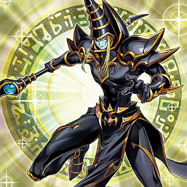

In [20]:
# load image
example = ds['test'][0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [21]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

timaeus the united dragon


### Ground Truth Text
66961194.jpg

While you control a "Blue-Eyes" monster, you choose the attack targets for your opponent's attacks. You can only use each of the following effects of "Dictator of D." once per turn. You can send 1 "Blue-Eyes White Dragon" from your hand or Deck to the GY; Special Summon this card from your hand. You can discard 1 "Blue-Eyes White Dragon", or 1 card that mentions it, then target 1 "Blue-Eyes" monster in your GY; Special Summon it.

In [22]:
from nltk.translate.bleu_score import corpus_bleu
import nltk
nltk.download('punkt')

# Prepare test data
test_dataset = ImageCaptioningDataset(ds['test'], processor)

# DataLoader for test data
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=1)

# Generate captions for test data
generated_captions = []
ground_truth_captions = []

model.eval()
with torch.no_grad():
    for example in ds['test']:
        image = example["image"]
        inputs = processor(images=image, return_tensors="pt").to(device)
        pixel_values = inputs.pixel_values

        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        generated_captions.append(generated_caption)
        ground_truth_captions.append(example["name"])

# Calculate BLEU score
bleu_score = corpus_bleu([[caption] for caption in ground_truth_captions], generated_captions)

print("BLEU Score:", bleu_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


BLEU Score: 0.22047589733582393


In [24]:
model.save_pretrained("/content/drive/MyDrive/image captioning models /card name/1e-4 dark magician")